# Anti-de Sitter spacetime

This worksheet demonstrates a few capabilities of [SageManifolds](http://sagemanifolds.obspm.fr) (version 1.0, as included in SageMath 7.5) in computations regarding the 4-dimensional anti-de Sitter spacetime.

Click [here](https://raw.githubusercontent.com/sagemanifolds/SageManifolds/master/Worksheets/v1.0/SM_AdS.ipynb) to download the worksheet file (ipynb format). To run it, you must start SageMath within the Jupyter notebook, via the command `sage -n jupyter`

*NB:* a version of SageMath at least equal to 7.5 is required to run this worksheet:

In [1]:
version()

'SageMath version 8.0.beta10, Release Date: 2017-06-11'

First we set up the notebook to display mathematical objects using LaTeX rendering:

In [2]:
%display latex

We also define a viewer for 3D plots (use `'threejs'` or `'jmol'` for interactive 3D graphics):

In [3]:
viewer3D = 'threejs' # must be 'threejs', 'jmol', 'tachyon' or None (default)

## Spacetime manifold

We declare the anti-de Sitter spacetime as a 4-dimensional differentiable manifold:

In [4]:
M = Manifold(4, 'M', r'\mathcal{M}')
print(M); M

4-dimensional differentiable manifold M


4-dimensional differentiable manifold M

<p>We consider hyperbolic coordinates $(\tau,\rho,\theta,\phi)$ on $\mathcal{M}$. Allowing for the standard coordinate singularities at $\rho=0$, $\theta=0$ or $\theta=\pi$, these coordinates cover the entire spacetime manifold (which is topologically $\mathbb{R}^4$). If we restrict ourselves to <em>regular</em> coordinates (i.e. to considering only mathematically well defined charts), the hyperbolic coordinates cover only an open part of $\mathcal{M}$, which we call $\mathcal{M}_0$, on which $\rho$ spans the open interval $(0,+\infty)$, $\theta$ the open interval $(0,\pi)$ and $\phi$ the open interval $(0,2\pi)$. Therefore, we declare:</p>

In [5]:
M0 = M.open_subset('M_0', r'\mathcal{M}_0' )
X_hyp.<ta,rh,th,ph> = M0.chart(r'ta:\tau rh:(0,+oo):\rho th:(0,pi):\theta ph:(0,2*pi):\phi')
print(X_hyp) ; X_hyp

Chart (M_0, (ta, rh, th, ph))


Chart (M_0, (ta, rh, th, ph))

In [6]:
X_hyp.coord_range()

ta: (-oo, +oo); rh: (0, +oo); th: (0, pi); ph: (0, 2*pi)

## $\mathbb{R}^{2,3}$ as an ambient space
The AdS metric can be defined as that induced by the immersion of $\mathcal{M}$ in $\mathbb{R}^{2,3}$, the latter being nothing but $\mathbb{R}^5$ equipped with a flat pseudo-Riemannian metric of signature $(-,-,+,+,+)$. Let us construct $\mathbb{R}^{2,3}$ as a 5-dimensional manifold covered by canonical coordinates:

In [7]:
R23 = Manifold(5, 'R23', r'\mathbb{R}^{2,3}')
X23.<U,V,X,Y,Z> = R23.chart()
print(X23); X23

Chart (R23, (U, V, X, Y, Z))


Chart (R23, (U, V, X, Y, Z))

We introduce on $\mathbb{R}^{2,3}$ the flat pseudo-Riemannian metric $h$ of signature $(-,-,+,+,+)$

In [8]:
h = R23.metric('h', signature=1)
h[0,0], h[1,1], h[2,2], h[3,3], h[4,4] = -1, -1, 1, 1, 1
h.display()

h = -dU*dU - dV*dV + dX*dX + dY*dY + dZ*dZ

The AdS immersion into $\mathbb{R}^{2,3}$ is defined as a differential map $\Phi$ from $\mathcal{M}$ to $\mathbb{R}^{2,3}$, by providing its expression in terms of $\mathcal{M}$'s default chart (which is X_hyp = $(\mathcal{M}_0,(\tau,\rho,\theta,\phi))$ ) and $\mathbb{R}^{2,3}$'s default chart (which is X23 = $(\mathbb{R}^{2,3},(U,V,X,Y,Z))$ ):

In [9]:
var('l', latex_name=r'\ell', domain='real')
assume(l>0)
Phi = M.diff_map(R23, [l*cosh(rh)*cos(ta/l),
                      l*cosh(rh)*sin(ta/l),
                      l*sinh(rh)*sin(th)*cos(ph),
                      l*sinh(rh)*sin(th)*sin(ph),
                      l*sinh(rh)*cos(th)],
                 name='Phi', latex_name=r'\Phi')
print(Phi); Phi.display()

Differentiable map Phi from the 4-dimensional differentiable manifold M to the 5-dimensional differentiable manifold R23


Phi: M --> R23
on M_0: (ta, rh, th, ph) |--> (U, V, X, Y, Z) = (l*cos(ta/l)*cosh(rh), l*cosh(rh)*sin(ta/l), l*cos(ph)*sin(th)*sinh(rh), l*sin(ph)*sin(th)*sinh(rh), l*cos(th)*sinh(rh))

The constant $\ell$ is the AdS length parameter. Considering AdS metric as a solution of vacuum Einstein equation with negative cosmological constant $\Lambda$, one has $\ell = \sqrt{-3/\Lambda}$.

Let us evaluate the image of a point via the map $\Phi$:

In [10]:
p = M((ta, rh, th, ph), name='p'); print(p)

Point p on the 4-dimensional differentiable manifold M


The coordinates of $p$ in the chart `X_hyp`:

In [11]:
X_hyp(p)

(ta, rh, th, ph)

In [12]:
q = Phi(p); print(q)

Point Phi(p) on the 5-dimensional differentiable manifold R23


In [13]:
X23(q)

(l*cos(ta/l)*cosh(rh),
 l*cosh(rh)*sin(ta/l),
 l*cos(ph)*sin(th)*sinh(rh),
 l*sin(ph)*sin(th)*sinh(rh),
 l*cos(th)*sinh(rh))

The image of $\mathcal{M}$ by the immersion $\Phi$ is a hyperboloid of one sheet, of equation $$-U^2-V^2+X^2+Y^2+Z^2=-\ell^2.$$
Indeed:

In [14]:
(Uq,Vq,Xq,Yq,Zq) = X23(q)
s = - Uq^2 - Vq^2 + Xq^2 + Yq^2 + Zq^2
s.simplify_full()

-l^2

We may use the immersion $\Phi$ to draw the coordinate grid $(\tau,\rho)$ in terms of the coordinates $(U,V,X)$ for $\theta=\pi/2$ and $\phi=0$ ($X\geq 0$ part) or $\phi=\pi$ 
($X\leq 0$ part). The red (rep. grey) curves are those for which $\rho={\rm const}$ 
(resp. $\tau={\rm const}$):

In [15]:
graph_hyp = X_hyp.plot(X23, mapping=Phi, ambient_coords=(V,X,U), fixed_coords={th:pi/2, ph:0}, 
                    ranges={ta:(0,2*pi), rh:(0,2)}, number_values=9, 
                    color={ta:'red', rh:'grey'}, thickness=2, parameters={l:1}, 
                    label_axes=False)  # phi = 0 => X > 0 part
graph_hyp += X_hyp.plot(X23, mapping=Phi, ambient_coords=(V,X,U), fixed_coords={th:pi/2, ph:pi},
                    ranges={ta:(0,2*pi), rh:(0,2)}, number_values=9, 
                    color={ta:'red', rh:'grey'}, thickness=2, parameters={l:1}, 
                    label_axes=False)  # phi = pi => X < 0 part
show(graph_hyp, aspect_ratio=1, viewer=viewer3D, online=True,
     axes_labels=['V','X','U'])

Graphics3d Object

To have a nicer picture, we add the plot of the hyperboloid obtained by `parametric_plot` with $(\tau,\rho)$ as parameters and the expressions of $(U,V,X)$ in terms of $(\tau,\rho)$  deduced from the coordinate representation of $\Phi$:

In [16]:
Phi.coord_functions() # the default pair of charts (X_hyp, X23) is assumed

Coordinate functions (l*cos(ta/l)*cosh(rh), l*cosh(rh)*sin(ta/l), l*cos(ph)*sin(th)*sinh(rh), l*sin(ph)*sin(th)*sinh(rh), l*cos(th)*sinh(rh)) on the Chart (M_0, (ta, rh, th, ph))

In [17]:
Ug = Phi.coord_functions()[0](ta,rh,pi/2,0).subs({l:1})  # l=1 substituted to have numerical values
Vg = Phi.coord_functions()[1](ta,rh,pi/2,0).subs({l:1})
Xg = Phi.coord_functions()[2](ta,rh,pi/2,0).subs({l:1})
Ug, Vg, Xg

(cos(ta)*cosh(rh), cosh(rh)*sin(ta), sinh(rh))

In [18]:
hyperboloid = parametric_plot3d([Vg, Xg, Ug], (ta,0,2*pi), (rh,-2,2), color=(1.,1.,0.9))
graph_hyp += hyperboloid
show(graph_hyp, aspect_ratio=1, viewer=viewer3D, online=True,
     axes_labels=['V','X','U'])

Graphics3d Object

## Spacetime metric

As mentionned above, the AdS metric $g$ on $\mathcal{M}$ is that induced by the flat metric $h$ on $\mathbb{R}^{2,3}$, i.e.$g$ is the pullback of $h$ by the differentiable map $\Phi$:

In [19]:
g = M.lorentzian_metric('g')
g.set( Phi.pullback(h) )

<p>The expression of $g$ in terms of $\mathcal{M}$'s default frame is found to be</p>

In [20]:
g.display()

g = -cosh(rh)^2 dta*dta + l^2 drh*drh + l^2*sinh(rh)^2 dth*dth + l^2*sin(th)^2*sinh(rh)^2 dph*dph

In [21]:
g[:]

[             -cosh(rh)^2                        0                        0                        0]
[                       0                      l^2                        0                        0]
[                       0                        0           l^2*sinh(rh)^2                        0]
[                       0                        0                        0 l^2*sin(th)^2*sinh(rh)^2]

<h2>Curvature</h2>
<p>The Riemann tensor of $g$ is</p>

In [22]:
Riem = g.riemann()
print(Riem)

Tensor field Riem(g) of type (1,3) on the 4-dimensional differentiable manifold M


In [23]:
Riem.display_comp(only_nonredundant=True)

Riem(g)^ta_rh,ta,rh = -1 
Riem(g)^ta_th,ta,th = -sinh(rh)^2 
Riem(g)^ta_ph,ta,ph = -sin(th)^2*sinh(rh)^2 
Riem(g)^rh_ta,ta,rh = -cosh(rh)^2/l^2 
Riem(g)^rh_th,rh,th = -sinh(rh)^2 
Riem(g)^rh_ph,rh,ph = -sin(th)^2*sinh(rh)^2 
Riem(g)^th_ta,ta,th = -cosh(rh)^2/l^2 
Riem(g)^th_rh,rh,th = 1 
Riem(g)^th_ph,th,ph = -sin(th)^2*sinh(rh)^2 
Riem(g)^ph_ta,ta,ph = -cosh(rh)^2/l^2 
Riem(g)^ph_rh,rh,ph = 1 
Riem(g)^ph_th,th,ph = sinh(rh)^2

<p>The Ricci tensor:</p>

In [24]:
Ric = g.ricci()
print(Ric)
Ric.display()

Field of symmetric bilinear forms Ric(g) on the 4-dimensional differentiable manifold M


Ric(g) = 3*cosh(rh)^2/l^2 dta*dta - 3 drh*drh - 3*sinh(rh)^2 dth*dth - 3*sin(th)^2*sinh(rh)^2 dph*dph

In [25]:
Ric[:]

[       3*cosh(rh)^2/l^2                       0                       0                       0]
[                      0                      -3                       0                       0]
[                      0                       0           -3*sinh(rh)^2                       0]
[                      0                       0                       0 -3*sin(th)^2*sinh(rh)^2]

<p>The Ricci scalar:</p>

In [26]:
R = g.ricci_scalar()
print(R)
R.display()

Scalar field r(g) on the 4-dimensional differentiable manifold M


r(g): M --> R
on M_0: (ta, rh, th, ph) |--> -12/l^2

We recover the fact that AdS spacetime has a constant curvature. It is indeed a **maximally symmetric space**. In particular, the Riemann tensor is expressible as
$$ R^i_{\ \, jlk} = \frac{R}{n(n-1)} \left( \delta^i_{\ \, k} g_{jl} - \delta^i_{\ \, l} g_{jk} \right), $$
where $n$ is the dimension of $\mathcal{M}$: $n=4$ in the present case. Let us check this formula here, under the form $R^i_{\ \, jlk} = -\frac{R}{6} g_{j[k} \delta^i_{\ \, l]}$:

In [27]:
delta = M.tangent_identity_field() 
Riem == - (R/6)*(g*delta).antisymmetrize(2,3)  # 2,3 = last positions of the type-(1,3) tensor g*delta

True

We may also check that AdS metric is a solution of the vacuum **Einstein equation** with (negative) cosmological constant $\Lambda = - 3/\ell^2$:

In [28]:
Lambda = -3/l^2
Ric - 1/2*R*g + Lambda*g == 0

True

## Radial null geodesics

The radial null geodesics of AdS spacetime are given by 
$$ \tau = \pm 2 \ell \left( \mathrm{atan} \left(\mathrm{e}^\rho\right) - \frac{\pi}{4} \right) + \tau_0,$$
where $\tau_0$ is a constant (the value of $\tau$ at $\rho=0$). 

Let us consider a finite family of these geodesics for $\theta=\pi/2$ and $\phi=0$ or $\pi$:

In [29]:
null_geod_out = [M.curve({X_hyp: [2*l*(atan(exp(rh)) - pi/4) + 2*pi*i/8, rh, pi/2, 0]}, 
                          (rh, 0, +oo)) for i in range(9)]
null_geod_in = [M.curve({X_hyp: [-2*l*(atan(exp(rh)) - pi/4) + 2*pi*i/8, rh, pi/2, pi]}, 
                         (rh, 0, +oo)) for i in range(9)]

In [30]:
print(null_geod_out[0])

Curve in the 4-dimensional differentiable manifold M


In [31]:
null_geod_out[0].display()

(0, +Infinity) --> M
   rh |--> (ta, rh, th, ph) = (-1/2*(pi - 4*arctan(e^rh))*l, rh, 1/2*pi, 0)

In [32]:
null_geod_in[0].display()

(0, +Infinity) --> M
   rh |--> (ta, rh, th, ph) = (1/2*(pi - 4*arctan(e^rh))*l, rh, 1/2*pi, pi)

Let us plot the null geodesics in terms of the coordinates $(\tau,\rho)$:

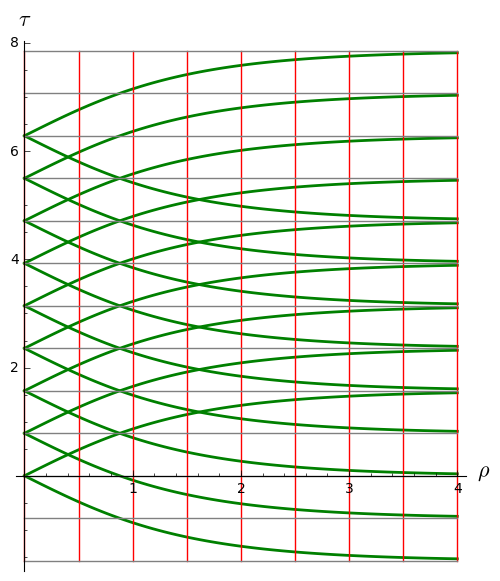

In [33]:
graph = Graphics()
for geod in null_geod_out:
    graph += geod.plot(X_hyp, ambient_coords=(rh,ta), prange=(0,4),
                       parameters={l:1}, color='green', thickness=2)
for geod in null_geod_in:
    graph += geod.plot(X_hyp, ambient_coords=(rh,ta), prange=(0,4),
                       parameters={l:1}, color='green', thickness=2)
graph += X_hyp.plot(X_hyp, ambient_coords=(rh,ta), fixed_coords={th:0, ph:pi}, 
                    ranges={ta:(-pi/2,5*pi/2), rh:(0,4)}, 
                    number_values={ta: 13, rh: 9},
                    color={ta:'red', rh:'grey'}, parameters={l:1})
show(graph, aspect_ratio=1/2)

We can get a 3D view of the radial null geodesics via the isometric immersion $\Phi$:

In [34]:
graph = Graphics()
for geod in null_geod_out:
    graph += geod.plot(X23, mapping=Phi, ambient_coords=(V,X,U), prange=(0,2),
                       parameters={l:1}, color='green', thickness=2, 
                       plot_points=20, label_axes=False)
for geod in null_geod_in:
    graph += geod.plot(X23, mapping=Phi, ambient_coords=(V,X,U), prange=(0,2),
                       parameters={l:1}, color='green', thickness=2, 
                       plot_points=20, label_axes=False)
show(graph+graph_hyp, aspect_ratio=1, viewer=viewer3D, online=True,
     axes_labels=['V','X','U'])

Graphics3d Object

Hence the image by $\Phi$ of the radial null geodesics are straight lines of $\mathbb{R}^{2,3}$.
This is not surprising since $\Phi$ is an isometric immersion and the null geodesics of
$\mathbb{R}^{2,3}$ are straight lines. Note that the null geodesics of $\mathrm{AdS}_4$ 
rule the hyperboloid (remember that a hyperboloid of one sheet is a ruled surface).  

## "Static" coordinates
Let us introduce spherical coordinates $(\tau,R,\theta,\phi)$ on the AdS spacetime via the coordinate change
$$R = \ell \sinh(\rho) $$
Despiste the $(\tau,\rho,\theta,\phi)$ coordinates are as adapted to the spacetime staticity as the $(\tau,R,\theta,\phi)$ coordinates, the latter ones are usually called "static" coordinates.

In [35]:
X_stat.<ta,R,th,ph> = M0.chart(r'ta:\tau R:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')
print(X_stat); X_stat

Chart (M_0, (ta, R, th, ph))


Chart (M_0, (ta, R, th, ph))

In [36]:
X_stat.coord_range()

ta: (-oo, +oo); R: (0, +oo); th: (0, pi); ph: (0, 2*pi)

In [37]:
hyp_to_stat = X_hyp.transition_map(X_stat, [ta, l*sinh(rh), th, ph])
hyp_to_stat.display()

ta = ta
R = l*sinh(rh)
th = th
ph = ph

In [38]:
hyp_to_stat.set_inverse(ta, asinh(R/l), th, ph, verbose=True)
stat_to_hyp = hyp_to_stat.inverse()
stat_to_hyp.display()

Check of the inverse coordinate transformation:
  ta == ta
  rh == arcsinh(sinh(rh))
  th == th
  ph == ph
  ta == ta
  R == R
  th == th
  ph == ph


ta = ta
rh = arcsinh(R/l)
th = th
ph = ph

The expression of the metric tensor in the new coordinates is

In [39]:
g.display(X_stat.frame(), X_stat)

g = -(R^2 + l^2)/l^2 dta*dta + l^2/(R^2 + l^2) dR*dR + R^2 dth*dth + R^2*sin(th)^2 dph*dph

Similarly, the expression of the Riemann tensor is

In [40]:
Riem.display_comp(X_stat.frame(), X_stat, only_nonredundant=True)

Riem(g)^ta_R,ta,R = -1/(R^2 + l^2) 
Riem(g)^ta_th,ta,th = -R^2/l^2 
Riem(g)^ta_ph,ta,ph = -R^2*sin(th)^2/l^2 
Riem(g)^R_ta,ta,R = -(R^2 + l^2)/l^4 
Riem(g)^R_th,R,th = -R^2/l^2 
Riem(g)^R_ph,R,ph = -R^2*sin(th)^2/l^2 
Riem(g)^th_ta,ta,th = -(R^2 + l^2)/l^4 
Riem(g)^th_R,R,th = 1/(R^2 + l^2) 
Riem(g)^th_ph,th,ph = -R^2*sin(th)^2/l^2 
Riem(g)^ph_ta,ta,ph = -(R^2 + l^2)/l^4 
Riem(g)^ph_R,R,ph = 1/(R^2 + l^2) 
Riem(g)^ph_th,th,ph = R^2/l^2

In [41]:
Phi.display(X_stat, X23)

Phi: M --> R23
on M_0: (ta, R, th, ph) |--> (U, V, X, Y, Z) = (sqrt(R^2 + l^2)*cos(ta/l), sqrt(R^2 + l^2)*sin(ta/l), R*cos(ph)*sin(th), R*sin(ph)*sin(th), R*cos(th))

## Conformal coordinates

We introduce coordinates $(\tilde{\tau},\chi,\theta,\phi)$ such that 
$$ \tilde{\tau} = \frac{\tau}{\ell} \qquad\mbox{and}\qquad \chi = \mathrm{atan}\left(\frac{R}{\ell}\right) $$

In [42]:
X_conf.<tat,ch,th,ph> = M0.chart(r'tat:\tilde{\tau} ch:(0,pi/2):\chi th:(0,pi):\theta ph:(0,2*pi):\phi')
print(X_conf); X_conf

Chart (M_0, (tat, ch, th, ph))


Chart (M_0, (tat, ch, th, ph))

In [43]:
X_conf.coord_range()

tat: (-oo, +oo); ch: (0, 1/2*pi); th: (0, pi); ph: (0, 2*pi)

In [44]:
stat_to_conf = X_stat.transition_map(X_conf, [ta/l, atan(R/l), th, ph])
stat_to_conf.display()

tat = ta/l
ch = arctan(R/l)
th = th
ph = ph

In [45]:
stat_to_conf.inverse().display()

ta = l*tat
R = l*tan(ch)
th = th
ph = ph

The expression of the metric tensor in the conformal coordinates is

In [46]:
g.display(X_conf.frame(), X_conf)

g = -l^2/cos(ch)^2 dtat*dtat + l^2/cos(ch)^2 dch*dch + l^2*sin(ch)^2/cos(ch)^2 dth*dth + l^2*sin(ch)^2*sin(th)^2/cos(ch)^2 dph*dph

The immersion of $\mathcal{M}$ in $(\mathbb{R}^{2,3},h)$ in terms of the conformal coordinates:

In [47]:
Phi.display(X_conf, X23)

Phi: M --> R23
on M_0: (tat, ch, th, ph) |--> (U, V, X, Y, Z) = (l*cos(tat)/abs(cos(ch)), l*sin(tat)/abs(cos(ch)), l*cos(ph)*sin(ch)*sin(th)/cos(ch), l*sin(ch)*sin(ph)*sin(th)/cos(ch), l*cos(th)*sin(ch)/cos(ch))

In [48]:
Riem.display_comp(X_conf.frame(), X_conf, only_nonredundant=True)

Riem(g)^tat_ch,tat,ch = -1/cos(ch)^2 
Riem(g)^tat_th,tat,th = -sin(ch)^2/cos(ch)^2 
Riem(g)^tat_ph,tat,ph = -sin(ch)^2*sin(th)^2/cos(ch)^2 
Riem(g)^ch_tat,tat,ch = -1/cos(ch)^2 
Riem(g)^ch_th,ch,th = -sin(ch)^2/cos(ch)^2 
Riem(g)^ch_ph,ch,ph = -sin(ch)^2*sin(th)^2/cos(ch)^2 
Riem(g)^th_tat,tat,th = -1/cos(ch)^2 
Riem(g)^th_ch,ch,th = cos(ch)^(-2) 
Riem(g)^th_ph,th,ph = -sin(ch)^2*sin(th)^2/cos(ch)^2 
Riem(g)^ph_tat,tat,ph = -1/cos(ch)^2 
Riem(g)^ph_ch,ch,ph = cos(ch)^(-2) 
Riem(g)^ph_th,th,ph = sin(ch)^2/cos(ch)^2

Let us draw the grid of static coordinates in terms of the conformal ones:

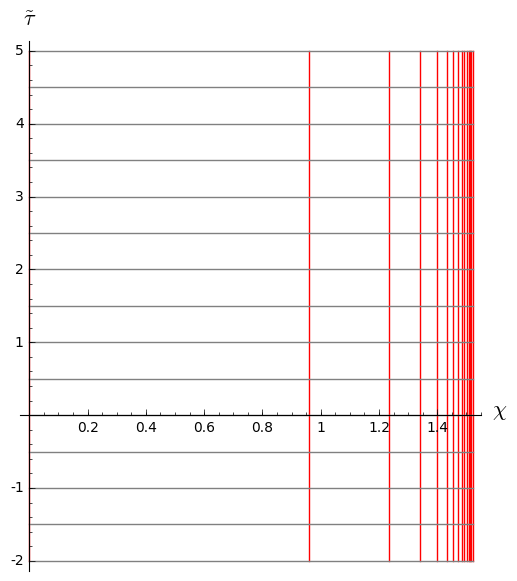

In [49]:
graph = X_stat.plot(X_conf, ambient_coords=(ch, tat), fixed_coords={th: pi/2, ph: pi}, 
                    ranges={ta: (-2,5), R: (0,20)}, number_values=15,
                    parameters={l:1},
                    color={ta: 'red', R: 'grey'})
show(graph, aspect_ratio=0.25)

## Conformal metric

Let us call $\Omega^{-2}$ the common factor that appear in the expression of the metric in conformal coordinates: 

In [50]:
Omega = M.scalar_field({X_conf: cos(ch)/l}, name='Omega', latex_name=r'\Omega')
Omega.display()

Omega: M --> R
on M_0: (ta, R, th, ph) |--> 1/sqrt(R^2 + l^2)
on M_0: (tat, ch, th, ph) |--> cos(ch)/l

In [51]:
Omega.display(X_hyp)

Omega: M --> R
on M_0: (ta, rh, th, ph) |--> 1/(l*cosh(rh))

We introduce the metric $\tilde g = \Omega^2 g$:

In [52]:
gt = M.lorentzian_metric('gt', latex_name=r'\tilde{g}')
gt.set(Omega^2*g)
gt.display(X_conf.frame(), X_conf)

gt = -dtat*dtat + dch*dch + sin(ch)^2 dth*dth + sin(ch)^2*sin(th)^2 dph*dph

## Einstein static universe

The Einstein static universe is the manifold $\mathbb{R}\times\mathbb{S}^3$ equipped with a Lorentzian metric equivalent to $\tilde{g}$. We consider here the part $E$ of $\mathbb{R}\times\mathbb{S}^3$ covered by hyperspherical coordinates:

In [53]:
E = Manifold(4, 'E')
print(E)

4-dimensional differentiable manifold E


In [54]:
XE.<tat,cht,th,ph> = E.chart(r'tat:\tilde{\tau} cht:(0,pi):\chi th:(0,pi):\theta ph:(0,2*pi):\phi')
XE

Chart (E, (tat, cht, th, ph))

In [55]:
XE.coord_range()

tat: (-oo, +oo); cht: (0, pi); th: (0, pi); ph: (0, 2*pi)

The conformal completion of AdS spacetime is defined by the map:

In [56]:
Psi = M.diff_map(E, {(X_conf, XE): [tat, ch, th, ph]},
                 name='Psi', latex_name=r'\Psi')
print(Psi); Psi.display()

Differentiable map Psi from the 4-dimensional differentiable manifold M to the 4-dimensional differentiable manifold E


Psi: M --> E
on M_0: (ta, R, th, ph) |--> (tat, cht, th, ph) = (ta/l, arctan(R/l), th, ph)
on M_0: (tat, ch, th, ph) |--> (tat, cht, th, ph) = (tat, ch, th, ph)

### Embedding of $E$ in $\mathbb{R}^5$

For visualization purposes, we introduce the (differentiable, not isometric) embedding $\Phi_E$ of the Einstein cylinder $\mathbb{R}\times\mathbb{S}^3$ in $\mathbb{R}^5$ that follows immediately from the canonical embedding of $\mathbb{S}^3$ in $\mathbb{R}^4$. We introduce $\mathbb{R}^5$ first:

In [57]:
R5 = Manifold(5, 'R5', latex_name=r'\mathbb{R}^5')
X5.<T,W,X,Y,Z> = R5.chart()
X5

Chart (R5, (T, W, X, Y, Z))

and define $\Phi_E$ as 

In [58]:
PhiE = E.diff_map(R5, {(XE, X5): [tat,
                                  cos(cht),
                                  sin(cht)*sin(th)*cos(ph), 
                                  sin(cht)*sin(th)*sin(ph), 
                                  sin(cht)*cos(th)]},
                  name='Phi_E', latex_name=r'\Phi_E')
print(PhiE); PhiE.display()

Differentiable map Phi_E from the 4-dimensional differentiable manifold E to the 5-dimensional differentiable manifold R5


Phi_E: E --> R5
   (tat, cht, th, ph) |--> (T, W, X, Y, Z) = (tat, cos(cht), cos(ph)*sin(cht)*sin(th), sin(cht)*sin(ph)*sin(th), cos(th)*sin(cht))

In [59]:
graphE = XE.plot(X5, ambient_coords=(W,X,T), mapping=PhiE, fixed_coords={th:pi/2, ph:0}, 
                 ranges={tat: (-pi,pi), cht: (0,pi)}, number_values=9, color='silver', 
                 thickness=0.5, label_axes=False)  # phi = 0 
graphE += XE.plot(X5, ambient_coords=(W,X,T), mapping=PhiE, fixed_coords={th:pi/2, ph:pi}, 
                  ranges={tat: (-pi,pi), cht: (0,pi)}, number_values=9, color='silver', 
                  thickness=0.5, label_axes=False)  # phi = pi
show(graphE, aspect_ratio=1, viewer=viewer3D, online=True, axes_labels=['W','X','tau'])

Graphics3d Object

## View of $\mathcal{M}$ on the Einstein cylinder

The view is obtained by composing the embeddings
$\Psi:\, \mathcal{M}\rightarrow E$ and $\Phi_E:\, E\rightarrow \mathbb{R}^5$, i.e. by introducing 
$$\Theta= \Phi_E\circ \Psi :\  \mathcal{M}\rightarrow  \mathbb{R}^5$$

In [60]:
Theta = PhiE * Psi
print(Theta)
Theta.display()

Differentiable map from the 4-dimensional differentiable manifold M to the 5-dimensional differentiable manifold R5


M --> R5
on M_0: (ta, rh, th, ph) |--> (T, W, X, Y, Z) = (ta/l, 1/cosh(rh), cos(ph)*sin(th)*sinh(rh)/cosh(rh), sin(ph)*sin(th)*sinh(rh)/cosh(rh), cos(th)*sinh(rh)/cosh(rh))
on M_0: (ta, R, th, ph) |--> (T, W, X, Y, Z) = (ta/l, l/sqrt(R^2 + l^2), R*cos(ph)*sin(th)/sqrt(R^2 + l^2), R*sin(ph)*sin(th)/sqrt(R^2 + l^2), R*cos(th)/sqrt(R^2 + l^2))
on M_0: (tat, ch, th, ph) |--> (T, W, X, Y, Z) = (tat, cos(ch), cos(ph)*sin(ch)*sin(th), sin(ch)*sin(ph)*sin(th), cos(th)*sin(ch))

In [61]:
graph = X_stat.plot(X5, ambient_coords=(W,X,T), mapping=Theta,
                     fixed_coords={th: pi/2, ph: 0}, 
                     ranges={ta: (-pi,pi), R: (0,20)}, number_values={ta: 9, R: 20},
                     parameters={l:1}, color={ta: 'red', R: 'grey'}, 
                     label_axes=False)  # phi = 0 
graph += X_stat.plot(X5, ambient_coords=(W,X,T), mapping=Theta,
                      fixed_coords={th: pi/2, ph: pi}, 
                      ranges={ta: (-pi,pi), R: (0,20)}, number_values={ta: 9, R: 20},
                      parameters={l:1}, color={ta: 'red', R: 'grey'}, 
                      label_axes=False)  # phi = pi 
graph += graphE  # superposing the plot of the Einstein cylinder
show(graph, aspect_ratio=1, viewer=viewer3D, online=True, axes_labels=['W','X','tau'])

Graphics3d Object

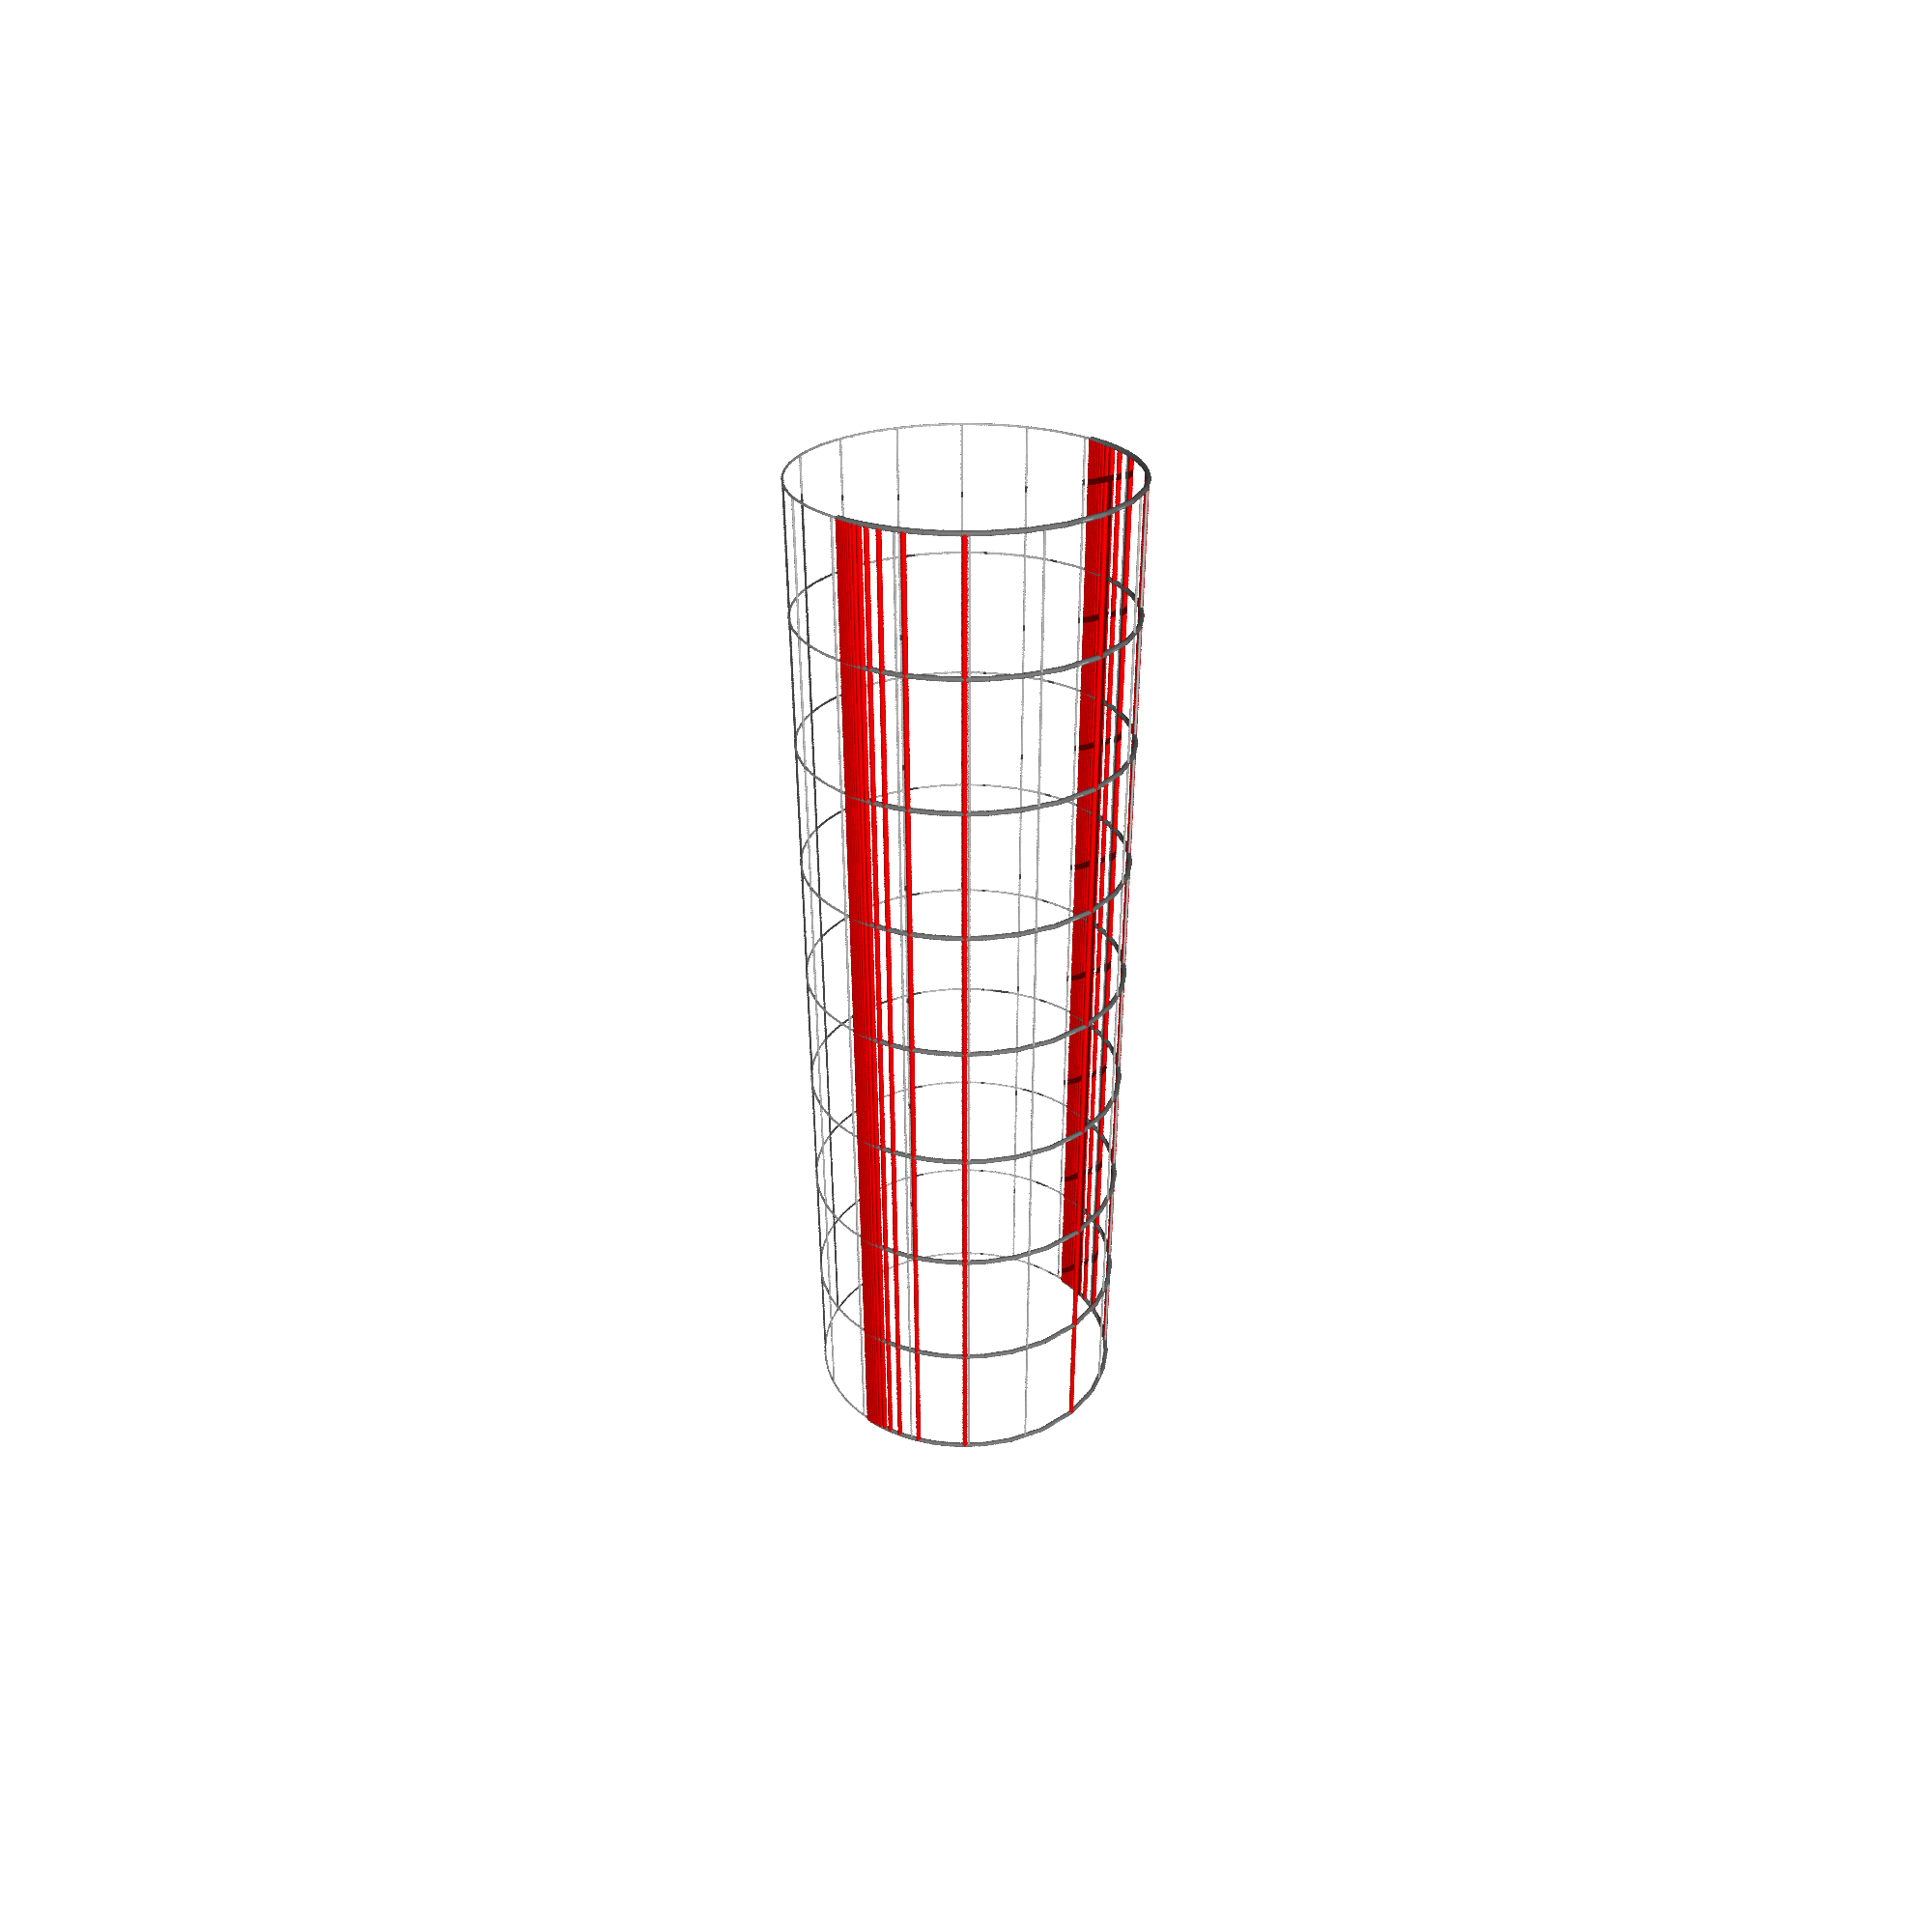

In [62]:
#graph = graph.rotate((0,0,1), 0.2)
show(graph, aspect_ratio=(2,2,2), viewer='tachyon', frame=False, figsize=20)

## Poincaré coordinates

The Poincaré coordinates are defined on the open subset $\mathcal{M}_{\rm P}$ of $\mathcal{M}_0$ defined by $U-X>0$ in terms of the canonical immersion $\Phi$ in $\mathbb{R}^{2,3}$. The open subset $\mathcal{M}_{\rm P}$ is usually called the **Poincaré patch** of AdS spacetime.

Given the expression of $\Phi$:

In [63]:
Phi.display()

Phi: M --> R23
on M_0: (ta, rh, th, ph) |--> (U, V, X, Y, Z) = (l*cos(ta/l)*cosh(rh), l*cosh(rh)*sin(ta/l), l*cos(ph)*sin(th)*sinh(rh), l*sin(ph)*sin(th)*sinh(rh), l*cos(th)*sinh(rh))
on M_0: (ta, R, th, ph) |--> (U, V, X, Y, Z) = (sqrt(R^2 + l^2)*cos(ta/l), sqrt(R^2 + l^2)*sin(ta/l), R*cos(ph)*sin(th), R*sin(ph)*sin(th), R*cos(th))
on M_0: (tat, ch, th, ph) |--> (U, V, X, Y, Z) = (l*cos(tat)/abs(cos(ch)), l*sin(tat)/abs(cos(ch)), l*cos(ph)*sin(ch)*sin(th)/cos(ch), l*sin(ch)*sin(ph)*sin(th)/cos(ch), l*cos(th)*sin(ch)/cos(ch))

we see that $U-X>0$ is equivalent to each of the following conditions:

- in hyperboloidal coordinates:

In [64]:
Phi.expr(X_hyp, X23)[0] - Phi.expr(X_hyp, X23)[2] > 0 

-l*cos(ph)*sin(th)*sinh(rh) + l*cos(ta/l)*cosh(rh) > 0

- in static coordinates:

In [65]:
Phi.expr(X_stat, X23)[0] - Phi.expr(X_stat, X23)[2] > 0 

-R*cos(ph)*sin(th) + sqrt(R^2 + l^2)*cos(ta/l) > 0

- in conformal coordinates:

In [66]:
Phi.expr(X_conf, X23)[0] - Phi.expr(X_conf, X23)[2] > 0 

-l*cos(ph)*sin(ch)*sin(th)/cos(ch) + l*cos(tat)/abs(cos(ch)) > 0

Since $\chi\in(0,\pi/2)$, we have actually $|\cos(\chi)| = \cos(\chi)>0$ (the lack of simplification of $|\cos(\chi)|$ for such a case will be corrected in a future version of SageMath); hence we declare:

In [67]:
MP = M0.open_subset('MP', latex_name=r'\mathcal{M}_{\rm P}', 
                    coord_def={X_hyp: cos(ta/l) - tanh(rh)*sin(th)*cos(ph)>0,
                               X_stat: cos(ta/l) - R/sqrt(R^2+l^2)*sin(th)*cos(ph)>0,
                               X_conf: cos(tat) - sin(ch)*sin(th)*cos(ph)>0})
print(MP)

Open subset MP of the 4-dimensional differentiable manifold M


In [68]:
print("Coordinate definition of the Poincaré patch in different charts:")
for chart in MP.atlas():
    show(chart)
    show(chart._restrictions)

Coordinate definition of the Poincaré patch in different charts:


Chart (MP, (ta, R, th, ph))

[-R*cos(ph)*sin(th)/sqrt(R^2 + l^2) + cos(ta/l) > 0]

Chart (MP, (ta, rh, th, ph))

[-cos(ph)*sin(th)*tanh(rh) + cos(ta/l) > 0]

Chart (MP, (tat, ch, th, ph))

[-cos(ph)*sin(ch)*sin(th) + cos(tat) > 0]

A view of the Poincaré patch on the AdS hyperboloid in $\mathbb{R}^{2,3}$:

In [69]:
graph = X_hyp.restrict(MP).plot(X23, mapping=Phi, ambient_coords=(V,X,U), 
                    fixed_coords={th: pi/2, ph:0}, 
                    ranges={ta:(0,2*pi), rh:(0,2)}, number_values={ta: 24, rh: 11}, 
                    color={ta:'red', rh:'grey'}, thickness=2, parameters={l:1}, 
                    label_axes=False)
graph += X_hyp.restrict(MP).plot(X23, mapping=Phi, ambient_coords=(V,X,U), 
                    fixed_coords={th: pi/2, ph:pi},
                    ranges={ta:(0,2*pi), rh:(0,2)}, number_values={ta: 24, rh: 11}, 
                    color={ta:'red', rh:'grey'}, thickness=2, parameters={l:1}, 
                    label_axes=False)
graph += hyperboloid
show(graph, aspect_ratio=1, viewer=viewer3D, online=True,
     axes_labels=['V','X','U'])

Graphics3d Object

A view of the Poincaré patch on the Einstein cylinder:

In [70]:
graph = X_stat.restrict(MP).plot(X5, ambient_coords=(W,X,T), mapping=Theta,
                     fixed_coords={th: pi/2, ph: 0}, 
                     ranges={ta: (-pi,pi), R: (0,10)}, number_values={ta: 15, R: 20},
                     parameters={l:1}, color={ta: 'red', R: 'grey'}, 
                     label_axes=False)  # phi = 0 
graph += X_stat.restrict(MP).plot(X5, ambient_coords=(W,X,T), mapping=Theta,
                      fixed_coords={th: pi/2, ph: pi}, 
                      ranges={ta: (-pi,pi), R: (0,10)}, number_values={ta: 15, R: 20},
                      parameters={l:1}, color={ta: 'red', R: 'grey'}, 
                      label_axes=False)  # phi = pi 
show(graph+graphE, aspect_ratio=(1,1,0.5), viewer=viewer3D, online=True, 
     axes_labels=['W','X','tau'])

Graphics3d Object

In [71]:
graph = X_conf.restrict(MP).plot(X5, ambient_coords=(X,Y,T), mapping=Theta,
                     fixed_coords={th: 0.9*pi/2}, 
                     ranges={tat: (-pi,pi), ch: (0,pi/2), ph:(0,2*pi)}, 
                     number_values=6,
                     parameters={l:1}, color={tat: 'red', ch: 'grey', ph: 'orange'}, 
                     label_axes=False)
show(graph+graphE, aspect_ratio=(1,1,0.5), viewer=viewer3D, online=True,
     axes_labels=['X','Y','tau'])

Graphics3d Object

We define the Poincaré coordinates $(t,x,y,u)$ on $\mathcal{M}_{\rm P}$ as

In [72]:
X_Poinc.<t,x,y,u> = MP.chart('t x y u:(0,+oo)')
X_Poinc

Chart (MP, (t, x, y, u))

In [73]:
X_Poinc.coord_range()

t: (-oo, +oo); x: (-oo, +oo); y: (-oo, +oo); u: (0, +oo)

The link between the conformal coordinates and the Poincaré ones is

In [74]:
conf_to_Poinc = X_conf.restrict(MP).transition_map(X_Poinc, 
                            [l*sin(tat)/(cos(tat) - sin(ch)*sin(th)*cos(ph)),
                             l*sin(ch)*sin(th)*sin(ph)/(cos(tat) - sin(ch)*sin(th)*cos(ph)),
                             l*sin(ch)*cos(th)/(cos(tat) - sin(ch)*sin(th)*cos(ph)),
                             l*(cos(tat) - sin(ch)*sin(th)*cos(ph))/cos(ch)])
conf_to_Poinc.display()

t = -l*sin(tat)/(cos(ph)*sin(ch)*sin(th) - cos(tat))
x = -l*sin(ch)*sin(ph)*sin(th)/(cos(ph)*sin(ch)*sin(th) - cos(tat))
y = -l*cos(th)*sin(ch)/(cos(ph)*sin(ch)*sin(th) - cos(tat))
u = -(cos(ph)*sin(ch)*sin(th) - cos(tat))*l/cos(ch)

In [75]:
conf_to_Poinc.set_inverse(atan2(2*l*t, x^2+y^2-t^2+l^2*(1+l^2/u^2)),
            acos(2*l^3/u/sqrt((x^2+y^2-t^2+l^2*(1+l^2/u^2))^2 + 4*l^2*t^2)),
            acos(2*l*y/sqrt((x^2+y^2-t^2+l^2*(1+l^2/u^2))^2
                                                    + 4*l^2*(t^2-l^4/u^2))),
            atan2(2*l*x, x^2+y^2-t^2-l^2*(1-l^2/u^2)),
            verbose=True)          

Check of the inverse coordinate transformation:
  tat == -arctan2(2*l^2*sin(tat)/(cos(ph)*sin(ch)*sin(th) - cos(tat)), -2*l^2*cos(tat)/(cos(ph)*sin(ch)*sin(th) - cos(tat)))
  ch == pi - arccos(abs(cos(ph)*sin(ch)*sin(th) - cos(tat))*cos(ch)/(cos(ph)*sin(ch)*sin(th) - cos(tat)))
  th == pi - arccos(abs(cos(ph)*sin(ch)*sin(th) - cos(tat))*cos(th)/(cos(ph)*sin(ch)*sin(th) - cos(tat)))
  ph == -arctan2(2*l^2*sin(ch)*sin(ph)*sin(th)/(cos(ph)*sin(ch)*sin(th) - cos(tat)), -(2*l^2*cos(ph)^2*cos(th)^2*sin(ch)^2 - 2*l^2*cos(ph)^2*sin(ch)^2 + 2*l^2*cos(ph)*cos(tat)*sin(ch)*sin(th) + (cos(ch)^2 + sin(ch)^2 - 1)*l^2)/(cos(ph)^2*cos(th)^2*sin(ch)^2 - cos(ph)^2*sin(ch)^2 + 2*cos(ph)*cos(tat)*sin(ch)*sin(th) + sin(tat)^2 - 1))
  t == t
  x == x
  y == y
  u == u


The test is passed, modulo some lack of simplification in the `arctan2` and `arccos` functions.

In [76]:
conf_to_Poinc.inverse().display()

tat = arctan2(2*l*t, l^2*(l^2/u^2 + 1) - t^2 + x^2 + y^2)
ch = arccos(2*l^3/(sqrt(4*l^2*t^2 + (l^2*(l^2/u^2 + 1) - t^2 + x^2 + y^2)^2)*u))
th = arccos(2*l*y/sqrt(4*(t^2 - l^4/u^2)*l^2 + (l^2*(l^2/u^2 + 1) - t^2 + x^2 + y^2)^2))
ph = arctan2(2*l*x, l^2*(l^2/u^2 - 1) - t^2 + x^2 + y^2)

### Metric in Poincaré coordinates

Let us compute the metric components in terms of the Poincaré coordinates:

In [77]:
g.display(X_Poinc.frame(), X_Poinc)

g = -u^2/l^2 dt*dt + u^2/l^2 dx*dx + u^2/l^2 dy*dy + l^2/u^2 du*du

We notice that the metric restricted to the hypersurfaces $u=\mathrm{const}$ is nothing but the Minkowski metric (up to some constant factor $u^2/\ell^2$):
$$ \left. g \right| _{u=\mathrm{const}}= \frac{u^2}{\ell^2} \left( 
    -\mathrm{d}t\otimes\mathrm{d}t + 
    \mathrm{d}x\otimes\mathrm{d}x + \mathrm{d}y\otimes\mathrm{d}y \right).$$
$(t,x,y)$ appear then as Minkowskian coordinates of these hypersurfaces. Hence the name *Poincaré coordinates* given to $(t,x,y,u)$: in terms of them, $\mathcal{M}_{\rm P}$ is sliced by a family, parametrized by $u$, of flat 3-dimensional spacetimes.  

In [78]:
Phi.restrict(MP).display(X_Poinc, X23)

Phi: MP --> R23
   (t, x, y, u) |--> (U, V, X, Y, Z) = (1/2*(l^4 + u^2*x^2 + u^2*y^2 + (l^2 - t^2)*u^2)/(l^2*u), t*u/l, 1/2*(l^4 + u^2*x^2 + u^2*y^2 - (l^2 + t^2)*u^2)/(l^2*u), u*x/l, u*y/l)

In [79]:
Poinc_to_stat = stat_to_conf.inverse().restrict(MP) * conf_to_Poinc.inverse()
Poinc_to_stat.display()

ta = l*arctan2(2*l*t, (l^4 + u^2*x^2 + u^2*y^2 + (l^2 - t^2)*u^2)/u^2)
R = 1/2*sqrt(l^8 + u^4*x^4 + u^4*y^4 + (l^4 + 2*l^2*t^2 + t^4)*u^4 - 2*(l^6 + l^4*t^2)*u^2 + 2*(l^4*u^2 + (l^2 - t^2)*u^4)*x^2 + 2*(l^4*u^2 + u^4*x^2 + (l^2 - t^2)*u^4)*y^2)/(l^2*u)
th = arccos(2*l*u^2*y/sqrt(l^8 + u^4*x^4 + u^4*y^4 + (l^4 + 2*l^2*t^2 + t^4)*u^4 - 2*(l^6 + l^4*t^2)*u^2 + 2*(l^4*u^2 + (l^2 - t^2)*u^4)*x^2 + 2*(l^4*u^2 + u^4*x^2 + (l^2 - t^2)*u^4)*y^2))
ph = arctan2(2*l*x, (l^4 + u^2*x^2 + u^2*y^2 - (l^2 + t^2)*u^2)/u^2)

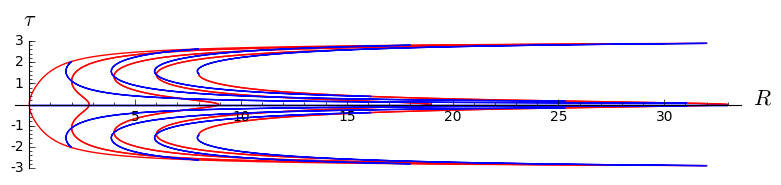

In [80]:
graph = X_Poinc.plot(X_stat.restrict(MP), ambient_coords=(R, ta), fixed_coords={u:1, y:0},
                     number_values=9, parameters={l:1}, plot_points=200,
                     color={t: 'red', x: 'blue', y: 'cyan', u: 'green'})
show(graph)

In [81]:
graph = X_Poinc.plot(X23, mapping=Phi.restrict(MP), ambient_coords=(V,X,U), 
                      fixed_coords={x:0, y:0}, 
                      ranges={t:(-1,1), x:(-1,1), y:(-1,1), u:(0.1, 6)}, number_values=13, 
                      color={t:'red', x:'yellow', y:'cyan', u: 'green'}, 
                      thickness=1, parameters={l:1}, 
                      label_axes=False)
graph += hyperboloid
show(graph, aspect_ratio=1, viewer=viewer3D, online=True,
     axes_labels=['V','X','U'])

Graphics3d Object

In [82]:
graph = X_Poinc.plot(X5, ambient_coords=(X,Y,T), mapping=Theta.restrict(MP),
                      fixed_coords={y:0}, 
                      ranges={t:(-2,2), x:(-2,2), y:(-2,2), u:(0.01, 6)}, 
                      number_values=7, 
                      color={t:'red', x:'yellow', y:'cyan', u: 'green'}, 
                      parameters={l:1}, label_axes=False)
show(graphE+graph, aspect_ratio=1, viewer=viewer3D, online=True)

Graphics3d Object

### Variant of Poincaré coordinates

In [83]:
X_Poinc_z.<t,x,y,z> = MP.chart('t x y z:(0,+oo)')
X_Poinc_z

Chart (MP, (t, x, y, z))

In [84]:
X_Poinc_z.coord_range()

t: (-oo, +oo); x: (-oo, +oo); y: (-oo, +oo); z: (0, +oo)

In [85]:
Poinc_to_Poinc_z = X_Poinc.transition_map(X_Poinc_z, [t, x, y, l^2/u])
Poinc_to_Poinc_z.display()

t = t
x = x
y = y
z = l^2/u

In [86]:
Poinc_to_Poinc_z.inverse().display()

t = t
x = x
y = y
u = l^2/z

In [87]:
g.display(X_Poinc_z.frame(), X_Poinc_z)

g = -l^2/z^2 dt*dt + l^2/z^2 dx*dx + l^2/z^2 dy*dy + l^2/z^2 dz*dz

In [88]:
Phi.restrict(MP).display(X_Poinc_z, X23)

Phi: MP --> R23
   (t, x, y, z) |--> (U, V, X, Y, Z) = (1/2*(l^2 - t^2 + x^2 + y^2 + z^2)/z, l*t/z, -1/2*(l^2 + t^2 - x^2 - y^2 - z^2)/z, l*x/z, l*y/z)

### Exponential Poincaré coordinates

In [89]:
X_Poinc_exp.<t,x,y,r> = MP.chart()
X_Poinc_exp

Chart (MP, (t, x, y, r))

In [90]:
X_Poinc_exp.coord_range()

t: (-oo, +oo); x: (-oo, +oo); y: (-oo, +oo); r: (-oo, +oo)

In [91]:
Poinc_to_Poinc_exp = X_Poinc.transition_map(X_Poinc_exp, [t, x, y, l*ln(u/l)])
Poinc_to_Poinc_exp.display()

t = t
x = x
y = y
r = l*log(u/l)

In [92]:
Poinc_to_Poinc_exp.inverse().display()

t = t
x = x
y = y
u = l*e^(r/l)

In [93]:
g.display(X_Poinc_exp.frame(), X_Poinc_exp)

g = -e^(2*r/l) dt*dt + e^(2*r/l) dx*dx + e^(2*r/l) dy*dy + dr*dr

In [94]:
Phi.restrict(MP).display(X_Poinc_exp, X23)

Phi: MP --> R23
   (t, x, y, r) |--> (U, V, X, Y, Z) = (1/2*(l^2*e^(2*r/l) - t^2*e^(2*r/l) + x^2*e^(2*r/l) + y^2*e^(2*r/l) + l^2)*e^(-r/l)/l, t*e^(r/l), -1/2*(l^2*e^(2*r/l) + t^2*e^(2*r/l) - x^2*e^(2*r/l) - y^2*e^(2*r/l) - l^2)*e^(-r/l)/l, x*e^(r/l), y*e^(r/l))